# Project 2 
## Gabriel Nulman
### Professor V. Elangovan - CMPSC 445

In [75]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image
import os
%matplotlib inline

In [76]:
resized_faces = {}

for img in os.listdir('images'):
    file = os.path.join('images', img)
    if os.path.isfile(file):
        img = cv2.imread(file)
        resize = cv2.resize(img, dsize=(50,50))
        gray = cv2.cvtColor(resize, cv2.COLOR_BGR2GRAY)
        np.transpose(gray)
        resized_faces[str(file)] = gray


resized_faces

{'images\\img1.jpg': array([[ 84,  85,  85, ...,  84,  84,  85],
        [ 84,  85,  86, ...,  84,  85,  85],
        [ 86,  86,  85, ...,  85,  86,  86],
        ...,
        [101,  67,  79, ...,  13,  24,  14],
        [ 85,  69,  48, ...,  16,  12,  16],
        [ 63,  50,  39, ...,  15,  17,  43]], dtype=uint8),
 'images\\img10.jpg': array([[134, 132, 133, ..., 143, 155, 129],
        [122, 124, 124, ..., 137, 152, 151],
        [143, 135, 139, ..., 149, 139, 142],
        ...,
        [ 33, 110, 106, ...,  85,  56, 113],
        [ 86,  55,  57, ...,  79,  88,  62],
        [115,  41,  46, ...,  68, 110,  47]], dtype=uint8),
 'images\\img2.jpg': array([[ 11,  13,   8, ...,  15,  17,   9],
        [ 12,  19,  12, ...,  17,  16,  15],
        [ 14,  11,  14, ...,  15,  18,  14],
        ...,
        [110,   0,   0, ..., 162,  59, 160],
        [ 38,   0,   0, ..., 177,  90, 155],
        [ 18,   0,   0, ..., 139, 101,  82]], dtype=uint8),
 'images\\img3.jpg': array([[215, 215, 217, .

In [77]:
n_squared = {}

for key in resized_faces.keys():
    vector = np.transpose(resized_faces[key]).reshape(2500, 1)
    n_squared[key] = vector

n_squared

{'images\\img1.jpg': array([[84],
        [84],
        [86],
        ...,
        [14],
        [16],
        [43]], dtype=uint8),
 'images\\img10.jpg': array([[134],
        [122],
        [143],
        ...,
        [113],
        [ 62],
        [ 47]], dtype=uint8),
 'images\\img2.jpg': array([[ 11],
        [ 12],
        [ 14],
        ...,
        [160],
        [155],
        [ 82]], dtype=uint8),
 'images\\img3.jpg': array([[215],
        [216],
        [218],
        ...,
        [114],
        [111],
        [109]], dtype=uint8),
 'images\\img4.jpg': array([[116],
        [119],
        [123],
        ...,
        [  4],
        [  3],
        [  7]], dtype=uint8),
 'images\\img5.jpg': array([[153],
        [156],
        [153],
        ...,
        [ 61],
        [ 87],
        [ 62]], dtype=uint8),
 'images\\img6.jpg': array([[147],
        [149],
        [152],
        ...,
        [ 56],
        [ 53],
        [ 51]], dtype=uint8),
 'images\\img7.jpg': array([[213],
    

In [78]:
total_vector = np.concatenate((n_squared['images\\img1.jpg'], n_squared['images\\img2.jpg'], n_squared['images\\img3.jpg'], 
            n_squared['images\\img4.jpg'], n_squared['images\\img5.jpg'], n_squared['images\\img6.jpg'],
            n_squared['images\\img7.jpg'], n_squared['images\\img8.jpg'], n_squared['images\\img9.jpg'],
            n_squared['images\\img10.jpg']), axis=1)

total_vector.shape

(2500, 10)

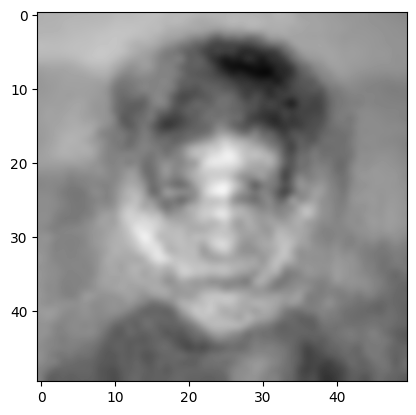

(2500, 1)

In [93]:
avg_vector = np.mean(total_vector, axis=1).reshape(2500, 1)
avg_face = np.transpose(avg_vector.reshape(50, 50))
plt.imshow(avg_face, cmap='gray', interpolation='bicubic')
plt.show()


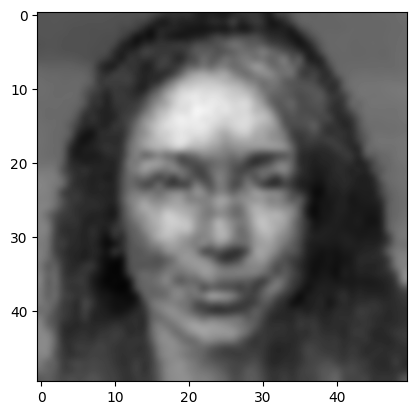

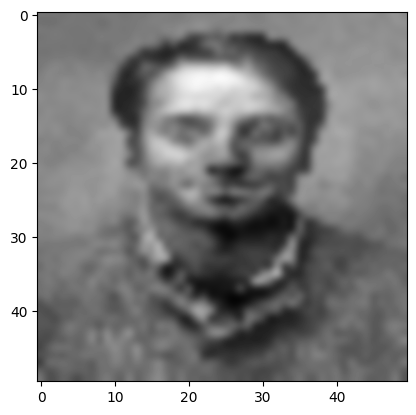

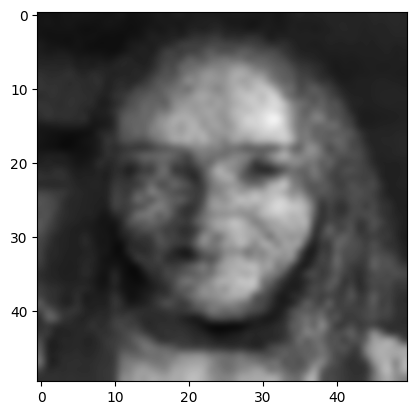

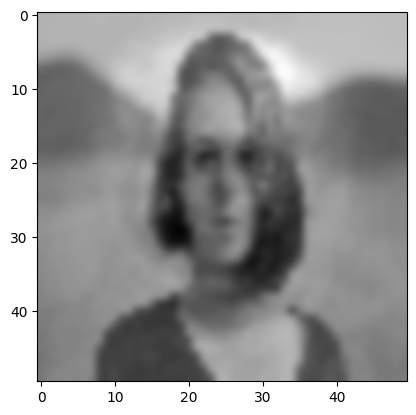

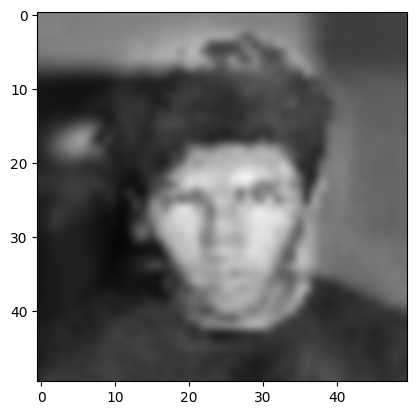

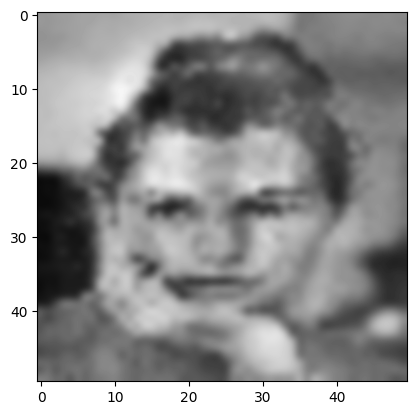

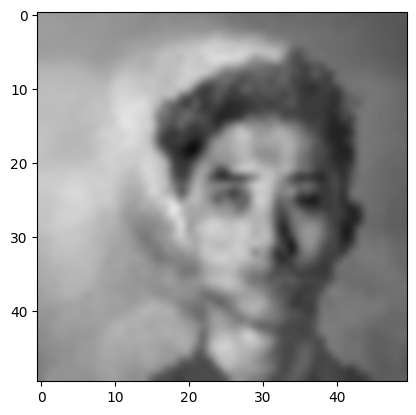

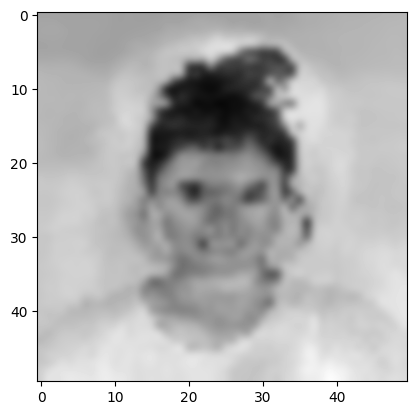

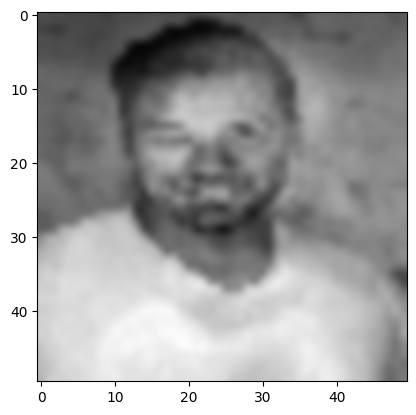

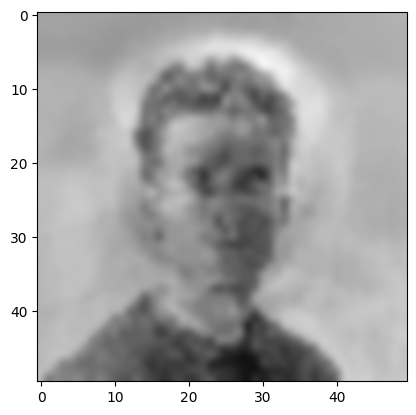

5

In [80]:
subtracted_avg = {}

for i in resized_faces.keys():
    subtracted_avg[i] = resized_faces[i] - avg_face

faces_diff = total_vector - avg_vector


for face in subtracted_avg:
    plt.imshow(subtracted_avg[face], cmap='gray', interpolation='bicubic')
    plt.show()


In [81]:
cov = np.cov(np.transpose(faces_diff))

In [82]:
eValues, eVectors = np.linalg.eigh(cov)
eValues

array([-1.36879119e-12,  8.26166092e+02,  1.21028285e+03,  1.26252829e+03,
        1.84499244e+03,  2.02850294e+03,  2.44012775e+03,  3.83455429e+03,
        4.57853088e+03,  6.38622360e+03])